In [1]:
# Template class for list based priority queues
# Use this template and rename for each of the implementations

import sys
from collections import deque

class UnsortedPQ:
    def __init__(self):
      # creating the list with indexing starting from 1 for simplicity
      self.size = 0
      self.Heap = []

    # minHeapify method to minHeapify the node at pos
    def minHeapify(self, pos):
      pass

    # Write this function to insert a node into the heap
    def insert(self, element):
      self.size+=1
      self.Heap.append(element)

    # Write this function to delete the rootNode
    def delete(self):
      if self.isPqEmpty():
        print('Heap is empty')
        return
       
      min = 0
      for pos in range(self.size):
        if self.Heap[pos] < self.Heap[min]:
          min = pos
      
      self.size-=1
      return self.Heap.pop(min)

    # Write this function to return the rootNode (here the minimum element in PQ)
    def minimumElement(self):
      if self.isPqEmpty():
        print('Heap is empty')
        return
       
      min = 0
      for pos in range(self.size):
        if self.Heap[pos] < self.Heap[min]:
          min = pos
      return self.Heap[min]

    # Write this function to return the size of the PriorityQueue
    def sizeOfPq(self): 
      return self.size

    # Write this function to return if the priorityQueue is empty or not
    # Return boolean value
    def isPqEmpty(self):
      return self.size<=0
    

    # Function to print the contents of the heap
    def printQueue(self):
      for i in range(self.size):
        print(self.Heap[i])

In [2]:
class SortedPQ:

    def __init__(self, maxsize=40):
        self.maxsize = maxsize
        self.size = 0
        # creating the list with indexing starting from 1 for simplicity
        self.Heap = [0]*(self.maxsize + 1)
        self.Heap[0] = -1 * sys.maxsize
        self.FRONT = 1

    # minHeapify method to minHeapify the node at pos
    def minHeapify(self, pos):
      while pos>=2:
        if self.Heap[pos] < self.Heap[pos-1]:
          self.Heap[pos], self.Heap[pos-1] = self.Heap[pos-1], self.Heap[pos]
        else:
           break
        pos-=1


    # Write this function to insert a node into the heap
    def insert(self, element):
      if self.size >= self.maxsize:
        self.Heap = self.Heap + [0]*self.maxsize
        self.maxsize = len(self.Heap) - 1
      
      self.size+=1
      self.Heap[self.size] = element
      self.minHeapify(self.size)

    # Write this function to delete the rootNode
    def delete(self):
      if self.isPqEmpty():
        print('Heap is empty')
        return
      
      self.size-=1
      return self.Heap.pop(self.FRONT)

    # Write this function to return the rootNode (here the minimum element in PQ)
    def minimumElement(self): 
      if self.isPqEmpty():
        print('Heap is empty')
        return

      return self.Heap[self.FRONT]

    # Write this function to return the size of the PriorityQueue
    def sizeOfPq(self): 
        return self.size

    # Write this function to return if the priorityQueue is empty or not
    # Return boolean value
    def isPqEmpty(self):
        return self.size <= 0

    # Function to print the contents of the heap
    def printQueue(self):
      for i in range(self.size):
        print(self.Heap[i])

In [3]:
# Template class for tree based priority queues

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None 

class HeapPQ:
    def __init__(self):
        self.head = None
        self.size = 0

    def insert(self, value):
      if self.isPqEmpty():
        self.head = Node(value)
        self.size+=1
        return
      
      self.size+=1
      path = []
      i = self.size
      
      while i>1:
        if i%2 == 0:
          path.append('L')
        else:
          path.append('R')
        i//=2
      path = path[::-1]

      node = self.head
      for ele in path[:-1]:
        if ele == 'L':
          node = node.left
        else:
          node = node.right
      
      new_node = Node(value)
      new_node.parent = node
      if path[-1] == 'L':
        node.left = new_node
      else:
        node.right = new_node
      
      self.minHeapifyUp(new_node)

    def delete(self):
      if self.isPqEmpty():
        print('Heap is empty.')
        return
      elif self.size == 1:
        self.head = None
        self.size-=1
        return
      
      path = []
      i = self.size
      
      while i>1:
        if i%2 == 0:
          path.append('L')
        else:
          path.append('R')
        i//=2
      path = path[::-1]
      
      node = self.head
      for ele in path[:-1]:
        if ele == 'L':
          node = node.left
        else:
          node = node.right
      
      if path[-1] == 'L':
        self.head.value, node.left.value = node.left.value, self.head.value
        node.left.parent = None
        node.left = None
      else:
        self.head.value, node.right.value = node.right.value, self.head.value
        node.right.parent = None
        node.right = None
      
      self.size-=1
      self.minHeapifyDown(self.head)
    
    def minHeapifyDown(self, node):
      if node.left == None and node.right == None:
        return
      elif node.right == None:
        if node.value > node.left.value:
          node.value, node.left.value = node.left.value, node.value
        return
      else:
        min_node = min([node, node.left, node.right], key = lambda x:x.value)
        if min_node == node:
          return
        node.value, min_node.value = min_node.value, node.value
        self.minHeapifyDown(min_node)
    
    def minHeapifyUp(self, node):
      while node != self.head:
        if node.value < node.parent.value:
          node.value, node.parent.value = node.parent.value, node.value
        else:
          break
        node = node.parent

    def peek(self):
      if self.isPqEmpty():
        return
      return self.head.value
    
    def sizeOfPq(self): 
      return self.size

    def isPqEmpty(self):
      return not self.head

    def printQueue(self):
      if not self.head:
        return
      
      q = deque()
      q.append(self.head)
      while q:
        node = q.popleft()
        print(node.value)
        if node.left:
          q.append(node.left)
        if node.right:
          q.append(node.right)

In [4]:
class HeapPQBottomUp:
    def __init__(self):
        self.head = None
        self.size = 0

    def construct_heap(self, lst):
      if self.isPqEmpty()and len(lst)==1:
        self.head = Node(lst[0])
        self.size+=1
        return
      
      self.size = len(lst)
      self.head = self.construct_heap_recursive(lst)
      
    def construct_heap_recursive(self, lst):
      if not len(lst):
        return None
      elif len(lst) == 1:
        node = Node(lst[0])
        return node
      
      k = lst[0]
      node = Node(k)
      lst = lst[1:]

      lft,rgt = 0,0
      count=len(lst)
      i = 0
      while True:
        if count-2**i<=0:
          lft+=count
          break
        lft+=2**i
        count-=2**i
        if count-2**i<=0:
          rgt+=count
          break
        rgt+=2**i
        count-=2**i
        i+=1
      # lft = len(lst)//2

      node.left = self.construct_heap_recursive(lst[:lft])
      if node.left:
        node.left.parent = node
      node.right = self.construct_heap_recursive(lst[lft:])
      if node.right:
        node.right.parent = node
      
      self.minHeapifyDown(node)
      return node

    def delete(self):
      if self.isPqEmpty():
        print('Heap is empty.')
        return
      elif self.size == 1:
        self.head = None
        self.size-=1
        return
      
      path = []
      i = self.size
      
      while i>1:
        if i%2 == 0:
          path.append('L')
        else:
          path.append('R')
        i//=2
      path = path[::-1]
      
      node = self.head
      for ele in path[:-1]:
        if ele == 'L':
          node = node.left
        else:
          node = node.right
      
      if path[-1] == 'L':
        self.head.value, node.left.value = node.left.value, self.head.value
        node.left.parent = None
        node.left = None
      else:
        self.head.value, node.right.value = node.right.value, self.head.value
        node.right.parent = None
        node.right = None
      
      self.size-=1
      self.minHeapifyDown(self.head)
    
    def minHeapifyDown(self, node):
      if node.left == None and node.right == None:
        return
      elif node.right == None:
        if node.value > node.left.value:
          node.value, node.left.value = node.left.value, node.value
          # self.minHeapifyDown(node.left)
        return
      else:
        min_node = min([node, node.left, node.right], key = lambda x:x.value)
        if min_node == node:
          return
        node.value, min_node.value = min_node.value, node.value
        self.minHeapifyDown(min_node)
    
    def minHeapifyUp(self, node):
      while node != self.head:
        if node.value < node.parent.value:
          node.value, node.parent.value = node.parent.value, node.value
        else:
          break
        node = node.parent

    def peek(self):
      if self.isPqEmpty():
        return
      return self.head.value

    def isPqEmpty(self):
      return not self.head

    def printQueue(self):
      if not self.head:
        return
      
      q = deque()
      q.append(self.head)
      while q:
        node = q.popleft()
        print(node.value)
        if node.left:
          q.append(node.left)
        if node.right:
          q.append(node.right)

In [5]:
def main():
  with open('./numbers.txt','r') as f:
    qtype = int(f.readline())
    if qtype == 0:
      pq = UnsortedPQ()
    elif qtype == 1:
      pq = SortedPQ()
    else:
      pq = HeapPQ()
    n = int(f.readline())

    for _ in range(n):
      pq.insert(int(f.readline()))
    
    # print(pq.Heap[:pq.size])
    #pq.delete()
    
    return pq

if __name__ == '__main__':
  main()

FileNotFoundError: ignored

# Plots and Visualisation

In [6]:
# Import plot modules
import matplotlib.pyplot as plt
import numpy as np
from time import perf_counter
import random

In [39]:
# Calculate times
def calc_time(timelist, lst, fn_to_call):  
  if fn_to_call.__name__ == 'delete':
    c=1
    time1 = perf_counter()
    timelist.append(time1 - time1)
    for ele in lst:
      fn_to_call()
      if c%10 == 0:
        timelist.append(perf_counter() - time1) 
      c+=1
    return

  if fn_to_call.__name__ in dir(HeapPQBottomUp):
    time1 = perf_counter()
    timelist.append(time1 - time1)
    fn_to_call(lst)
    timelist.append(perf_counter() - time1)
    return
  
  c=1
  time1 = perf_counter()
  timelist.append(time1 - time1)
  for ele in lst:
    fn_to_call(ele)
    if c%10 == 0:
      timelist.append(perf_counter() - time1) 
    c+=1

In [60]:
def plot_graphs_for_insert():
  lst = list(range(-5000, 5000))
  random.shuffle(lst)

  # Bottom Up Heap
  pqUp = HeapPQBottomUp()
  global timelist1
  timelist1 = []
  calc_time(timelist1, lst, pqUp.construct_heap)

  # Top Down Heap
  pqDown = HeapPQ()
  global timelist2
  timelist2 = []
  calc_time(timelist2, lst, pqDown.insert)

  # Unsorted PQ
  u_pq = UnsortedPQ()
  global timelist3
  timelist3 = []
  calc_time(timelist3, lst, u_pq.insert)

  # Sorted PQ
  s_pq = SortedPQ()
  global timelist4
  timelist4 = []
  calc_time(timelist4, lst, s_pq.insert)

  timelist1 = list(np.linspace(timelist1[0], timelist1[1], len(timelist2)))
  # Plot
  plt.figure(figsize=(12,6))
  plt.plot(timelist1, label='Bottom Up')
  plt.plot(timelist2, label='Top Down')
  plt.plot(timelist3, label='UnsortedPQ')
  plt.plot(timelist4, label='SortedPQ')
  plt.xlabel('Insertion (Per 10 element plot)')
  plt.ylabel('Time')
  plt.legend()

  return ((pqUp, pqDown, u_pq, s_pq))

In [61]:
def plot_graphs_for_delete(pqUp, pqDown, u_pq, s_pq):
  lst = list(range(-5000, 5000))
  random.shuffle(lst)

  # Bottom Up Heap
  global timelist5
  timelist5 = []
  calc_time(timelist5, lst, pqUp.delete)

  # Top Down Heap
  global timelist6
  timelist6 = []
  calc_time(timelist6, lst, pqDown.delete)

  # Unsorted PQ
  global timelist7
  timelist7 = []
  calc_time(timelist7, lst, u_pq.delete)

  # Sorted PQ
  global timelist8
  timelist8 = []
  calc_time(timelist8, lst, s_pq.delete)

  # Plot
  plt.figure(figsize=(12,6))
  plt.plot(timelist5, label='Bottom Up')
  plt.plot(timelist6, label='Top Down')
  plt.plot(timelist7, label='UnsortedPQ')
  plt.plot(timelist8, label='SortedPQ')
  plt.xlabel('Deletion (Per 10 element plot)')
  plt.ylabel('Time')
  plt.legend()

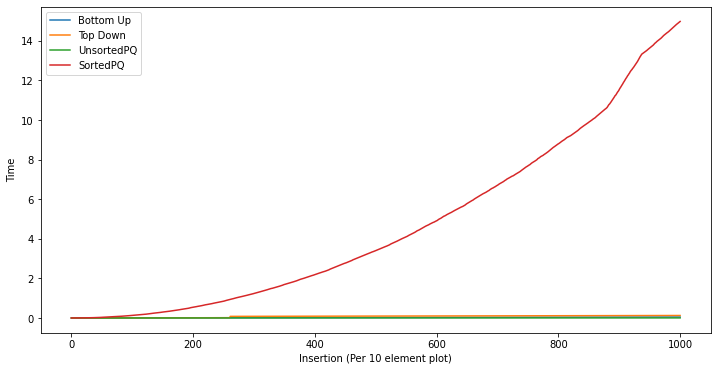

In [62]:
if __name__ == '__main__':
  pqUp, pqDown, u_pq, s_pq = plot_graphs_for_insert()


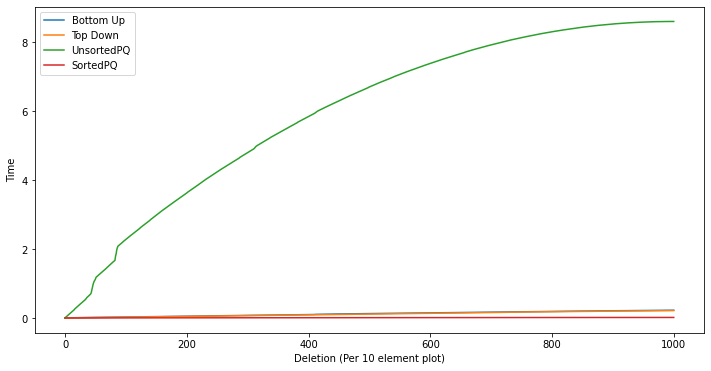

In [63]:
if __name__ == '__main__':
  plot_graphs_for_delete(pqUp, pqDown, u_pq, s_pq)

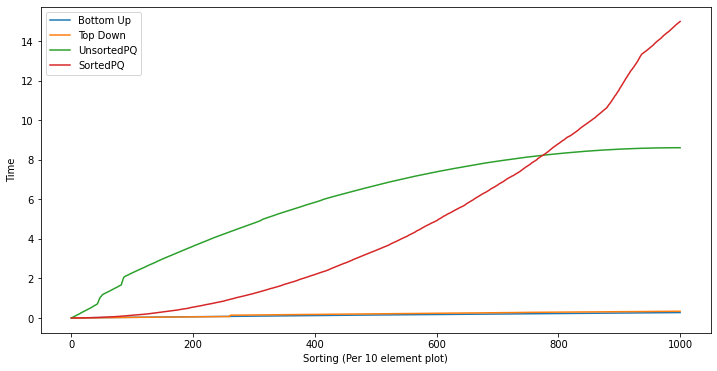

In [64]:
if __name__ == '__main__':
  # Plot
  plt.figure(figsize=(12,6))
  global timelist1,timelist2,timelist3,timelist4,timelist5,timelist6,timelist7,timelist8
  plt.plot([sum(i) for i in zip(timelist1, timelist5)], label='Bottom Up')
  plt.plot([sum(i) for i in zip(timelist2, timelist6)], label='Top Down')
  plt.plot([sum(i) for i in zip(timelist3, timelist7)], label='UnsortedPQ')
  plt.plot([sum(i) for i in zip(timelist4, timelist8)], label='SortedPQ')
  plt.xlabel('Sorting (Per 10 element plot)')
  plt.ylabel('Time')
  plt.legend()